In [1]:
# import packages
using LinearAlgebra, HDF5, FileIO, Statistics, Interpolations, ImageFiltering
using DataFrames
push!(LOAD_PATH,"../")
using HF0d

#set up plotting
using ColorSchemes
cmap = colorschemes[:balance]
using PyPlot
rgbtotuple(c) = (c.r,c.g,c.b)
pal = rgbtotuple.(colorschemes[:Set1_9])
function remove_extra_borders!(contourlines)
    for c in contourlines.collections
        c.set_edgecolor("face")
    end
end

[ Info: Precompiling HF0d [ccd8c7c9-aee5-4f5d-a325-814364d6db47]


remove_extra_borders! (generic function with 1 method)

In [2]:
# Set up model
hfm = HFModel_vanHoveDOS(4,2000,1,1.2);
μs = 0.0:0.05:5
# Run optimization --- takes about a minute
nsopt, Φsopt = run_HF(μs,hfm,10);

typeof(total_densities) = Vector{Float64}
μ = 0.45 (10/101)
μ = 0.95 (20/101)
μ = 1.45 (30/101)
μ = 1.95 (40/101)
μ = 2.45 (50/101)
μ = 2.95 (60/101)
μ = 3.45 (70/101)
μ = 3.95 (80/101)
μ = 4.45 (90/101)
μ = 4.95 (100/101)


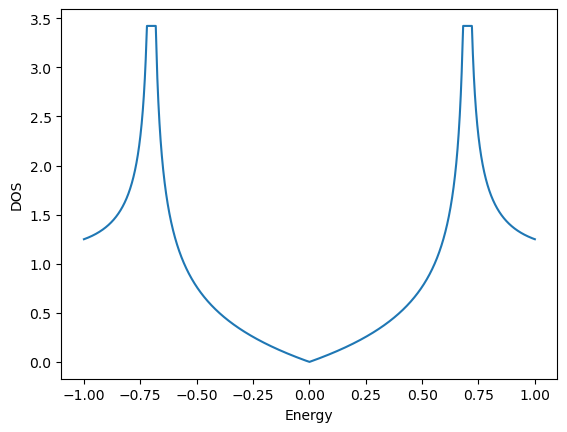

PyObject Text(24.000000000000007, 0.5, 'DOS')

In [5]:
plot(hfm.ϵs[1],hfm.ρs[1])
xlabel("Energy")
ylabel("DOS")

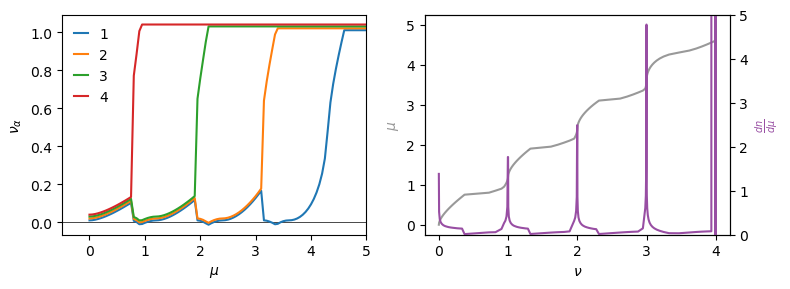

In [15]:
fig, axs = subplots(1,2,figsize=(8,3))

ns2 = sort.(nsopt)
for α in 1:hfm.Nf
    offset = 0.01*α
    axs[1].plot(μs,offset .+ getindex.(ns2,α),label=α)
end
axs[1].axhline(0.0,color="k",lw=0.5,ls="-",zorder=-5)
axs[1].legend(loc="upper left",handlelength=1.0,frameon=false)
axs[1].set_xlabel(L"$\mu$")
axs[1].set_ylabel(L"$\nu_\alpha$")
axs[1].set_xlim(-0.5,5)

ntots = sum.(nsopt)
axs[2].plot(ntots,μs,color=pal[9])
axs[2].set_ylabel(L"$\mu$",color=pal[9])
axs[2].set_xlabel(L"$\nu$")

axt = axs[2].twinx()
ntots = sum.(nsopt)
axt.plot(ntots[1:end-1],  0.1*diff(μs) ./ diff(ntots),color=pal[4])
axt.set_ylabel(L"$\frac{dn}{d\mu}$",color=pal[4])
axt.set_ylim(0,5)
fig.tight_layout()